<a href="https://colab.research.google.com/github/samanvithkashyap/movie-recommender-mcse/blob/main/Movie_Recommender.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import all libraries and check if the data is loaded properly
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

sns.set_style("whitegrid")
try:
    df = pd.read_csv('data.csv', dtype={'title': 'string', 'genres': 'string'})
    print("--- Data Loaded Successfully ---")
    df.info()
except FileNotFoundError:
    print("Error: data.csv not found.")
    exit()
except Exception as e:
    print(f"An error occurred during data loading: {e}")
    exit()

--- Data Loaded Successfully ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   userId     2000 non-null   int64  
 1   movieId    2000 non-null   int64  
 2   rating     1883 non-null   float64
 3   timestamp  1900 non-null   float64
 4   title      2000 non-null   string 
 5   genres     1900 non-null   string 
dtypes: float64(2), int64(2), string(2)
memory usage: 93.9 KB


In [ ]:
# Unit 1, Q1
print(
"""
| Column | Data Type | Reasoning |
| :--- | :--- | :--- |
| **userId** | `int64` | Represents a unique identifier for users. An integer is suitable. |
| **movieId** | `int64` | Represents a unique identifier for movies. An integer is suitable. |
| **rating** | `float64` | Ratings include half-point values (e.g., 3.5, 4.5), requiring a float. |
| **timestamp** | `float64` | The raw data is a float, which is numeric. |
| **title** | `string` | Movie titles are text, s A string is the correct type. |
| **genres** | `string` | Genres are text, A string is the correct type. |
"""
)


| Column | Data Type | Reasoning |
| :--- | :--- | :--- |
| **userId** | `int64` | Represents a unique identifier for users. An integer is suitable. |
| **movieId** | `int64` | Represents a unique identifier for movies. An integer is suitable. |
| **rating** | `float64` | Ratings include half-point values (e.g., 3.5, 4.5), requiring a float. |
| **timestamp** | `float64` | The raw data is a float, which is numeric. |
| **title** | `string` | Movie titles are text, s A string is the correct type. |
| **genres** | `string` | Genres are text, A string is the correct type. |



In [ ]:
# Unit 1, Q2
df_cleaned_q2 = df.dropna(subset=['rating']).copy()

print("\n--- Rating Statistics ---")
rating_stats = df_cleaned_q2['rating'].describe()
rating_stats['mode'] = df_cleaned_q2['rating'].mode().iloc[0]
rating_stats['range'] = df_cleaned_q2['rating'].max() - df_cleaned_q2['rating'].min()
print(rating_stats)

print("\n--- User Frequency Statistics ---")
user_frequency = df_cleaned_q2['userId'].value_counts()
user_freq_stats = user_frequency.describe()
user_freq_stats['mode'] = user_frequency.mode().iloc[0]
user_freq_stats['range'] = user_frequency.max() - user_frequency.min()
print(user_freq_stats)


--- Rating Statistics ---
count    1883.000000
mean        3.648964
std         1.077241
min         0.500000
25%         3.000000
50%         4.000000
75%         4.500000
max         5.000000
mode        4.000000
range       4.500000
Name: rating, dtype: float64

--- User Frequency Statistics ---
count     18.000000
mean     104.611111
std       82.247931
min       26.000000
25%       41.000000
50%       74.000000
75%      141.750000
max      299.000000
mode      46.000000
range    273.000000
Name: count, dtype: float64


In [ ]:
# Unit 1, Q3
print("\nMissing Values Before Cleaning")
print(df.isnull().sum())

df_cleaned = df.dropna(subset=['rating']).copy()
df_cleaned['genres'] = df_cleaned['genres'].replace(['(no genres listed)', ''], np.nan)

print("\nMissing Values After Cleaning (`rating` dropped, `genres` standardized)")
print(df_cleaned.isnull().sum())


Missing Values Before Cleaning
userId         0
movieId        0
rating       117
timestamp    100
title          0
genres       100
dtype: int64

Missing Values After Cleaning (`rating` dropped, `genres` standardized)
userId        0
movieId       0
rating        0
timestamp    96
title         0
genres       92
dtype: int64



Plot saved: rating_histogram.png
Plot saved: rating_boxplot.png


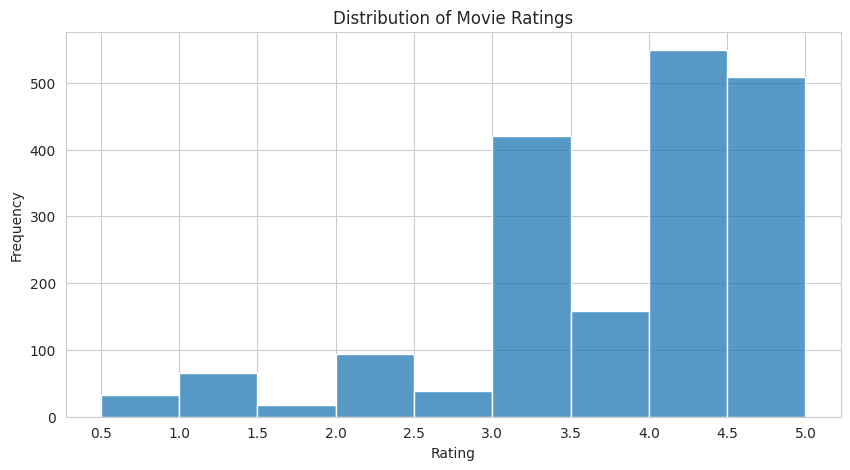

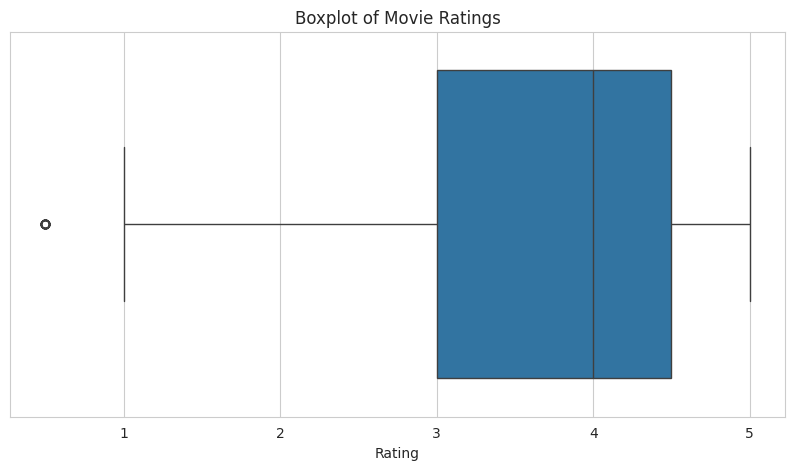

In [ ]:
# Unit 1, Q4

plt.figure(figsize=(10, 5))
bins = np.arange(0.5, 5.1, 0.5)
sns.histplot(df_cleaned['rating'], bins=bins, kde=False)
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.xticks(bins)
plt.savefig('rating_histogram.png')
print("\nPlot saved: rating_histogram.png")

plt.figure(figsize=(10, 5))
sns.boxplot(x=df_cleaned['rating'])
plt.title('Boxplot of Movie Ratings')
plt.xlabel('Rating')
plt.savefig('rating_boxplot.png')
print("Plot saved: rating_boxplot.png")
plt.show()

Rating IQR: 1.50, Lower Bound: 0.75, Upper Bound: 6.75
Original shape (ratings cleaned): (1883, 6)
Shape after removing 1.5xIQR outliers: (1850, 6)
Number of outliers removed: 33
Plot saved: rating_outlier_comparison_boxplot.png


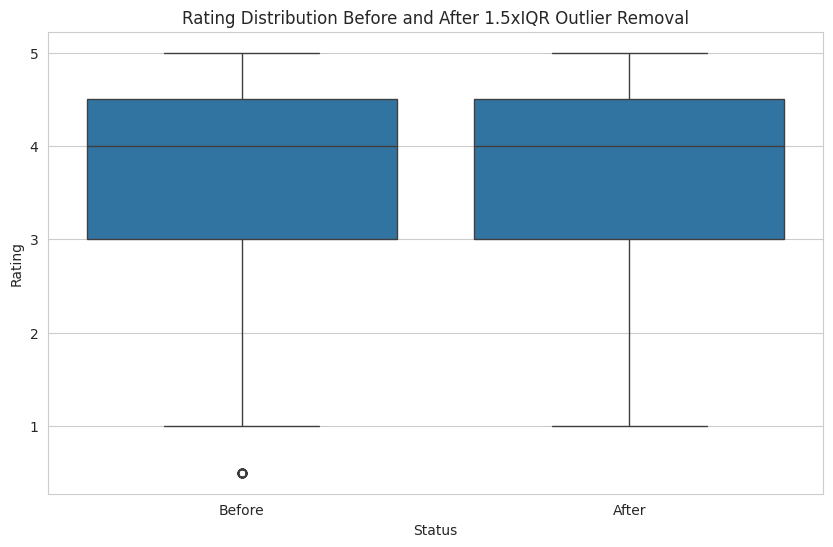

In [ ]:

# Unit 1, Q5

Q1 = df_cleaned['rating'].quantile(0.25)
Q3 = df_cleaned['rating'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Rating IQR: {IQR:.2f}, Lower Bound: {lower_bound:.2f}, Upper Bound: {upper_bound:.2f}")

df_no_outliers = df_cleaned[
    (df_cleaned['rating'] >= lower_bound) & (df_cleaned['rating'] <= upper_bound)
].copy()

print(f"Original shape (ratings cleaned): {df_cleaned.shape}")
print(f"Shape after removing 1.5xIQR outliers: {df_no_outliers.shape}")
print(f"Number of outliers removed: {df_cleaned.shape[0] - df_no_outliers.shape[0]}")

df_cleaned['Outlier_Status'] = 'Before'
df_no_outliers['Outlier_Status'] = 'After'
df_boxplot_comparison = pd.concat([df_cleaned.assign(Outlier_Status='Before'), df_no_outliers.assign(Outlier_Status='After')])

plt.figure(figsize=(10, 6))
sns.boxplot(x='Outlier_Status', y='rating', data=df_boxplot_comparison)
plt.title('Rating Distribution Before and After 1.5xIQR Outlier Removal')
plt.ylabel('Rating')
plt.xlabel('Status')
plt.savefig('rating_outlier_comparison_boxplot.png')
print("Plot saved: rating_outlier_comparison_boxplot.png")
plt.show()

Plot saved: rating_qq_plot.png


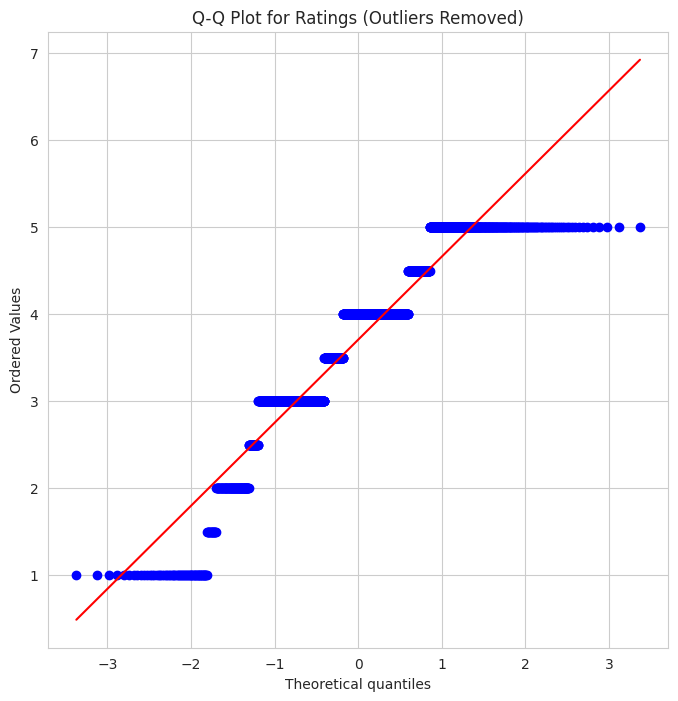

In [ ]:
# Unit 1, Q6

plt.figure(figsize=(8, 8))
stats.probplot(df_no_outliers['rating'], dist="norm", plot=plt)
plt.title('Q-Q Plot for Ratings (Outliers Removed)')
plt.savefig('rating_qq_plot.png')
print("Plot saved: rating_qq_plot.png")
plt.show()


Correlation of Genres with Rating
               rating
Musical      0.074772
Animation    0.050403
War          0.048050
Adventure    0.039538
Crime        0.038146
Mystery      0.034043
Fantasy      0.029528
Documentary  0.023962
Western      0.023333
Film-Noir    0.019341
Thriller     0.017120
Children     0.009284
Drama        0.004267
Action      -0.000156
Horror      -0.010476
Sci-Fi      -0.010876
IMAX        -0.049239
Romance     -0.065449
Comedy      -0.099438

Plot saved: genre_rating_correlation_heatmap.png


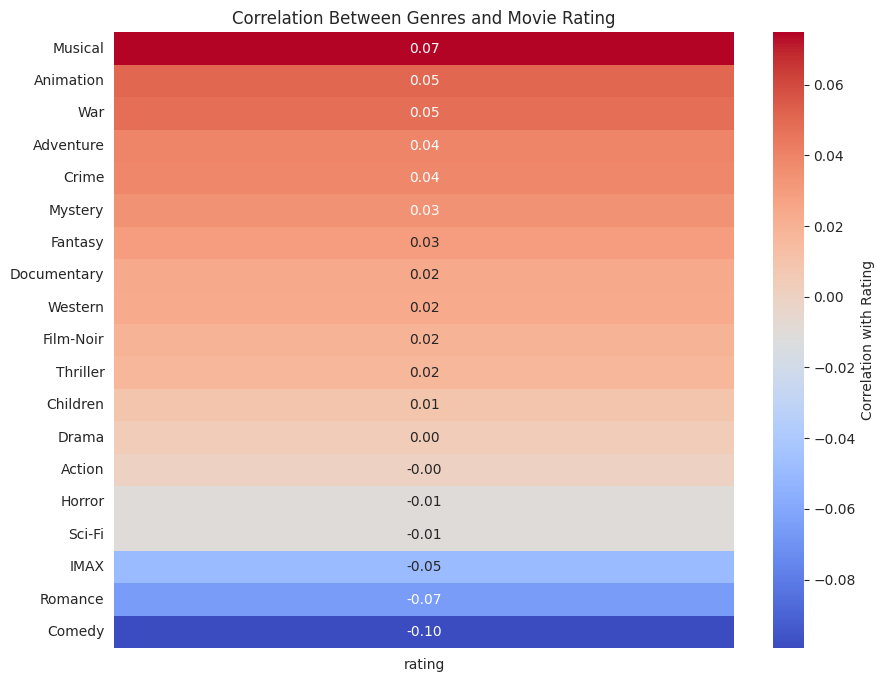

In [ ]:
# Unit 1, Q7

df_cleaned['genres_list'] = df_cleaned['genres'].fillna('').str.split('|')

mlb = MultiLabelBinarizer()
genre_dummies = pd.DataFrame(
    mlb.fit_transform(df_cleaned['genres_list']),
    columns=mlb.classes_,
    index=df_cleaned.index
)

if '' in genre_dummies.columns:
    genre_dummies = genre_dummies.drop(columns=[''])

df_corr = pd.concat([df_cleaned['rating'], genre_dummies], axis=1)
corr_matrix = df_corr.corr()
corr_with_rating = corr_matrix[['rating']].drop('rating').sort_values(by='rating', ascending=False)

print("\nCorrelation of Genres with Rating")
print(corr_with_rating)

plt.figure(figsize=(10, 8))
sns.heatmap(corr_with_rating, annot=True, cmap='coolwarm', fmt='.2f', cbar_kws={'label': 'Correlation with Rating'})
plt.title('Correlation Between Genres and Movie Rating')
plt.savefig('genre_rating_correlation_heatmap.png')
print("\nPlot saved: genre_rating_correlation_heatmap.png")
plt.show()

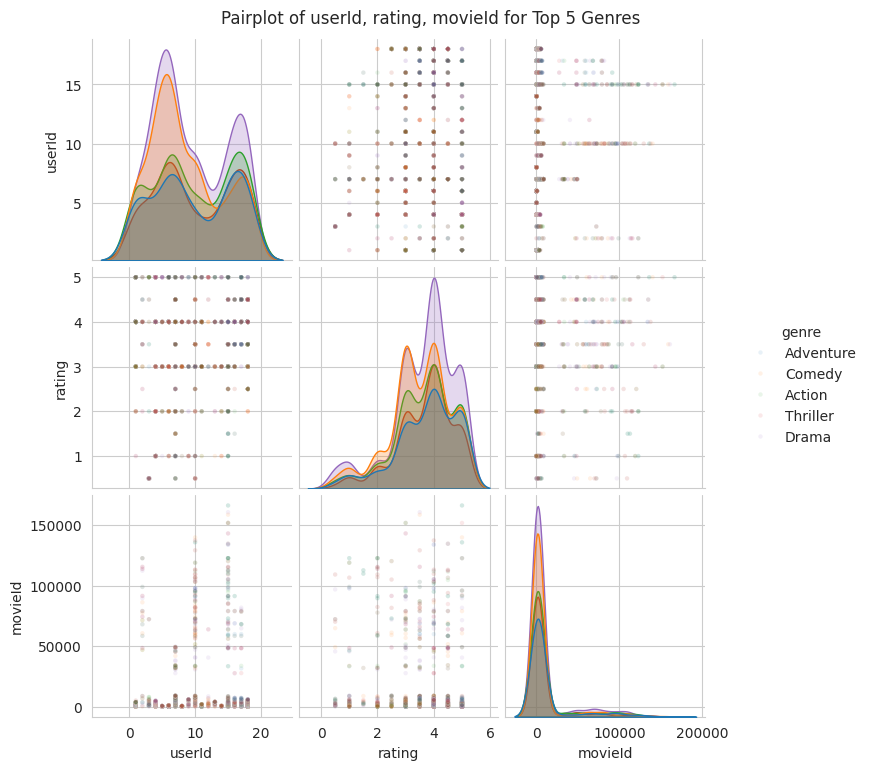

In [ ]:
# Unit 1, Q8

df_exploded = df_cleaned.assign(genre=df_cleaned['genres'].str.split('|')).explode('genre')
df_exploded['genre'] = df_exploded['genre'].str.strip()
df_exploded = df_exploded.dropna(subset=['genre'])
df_exploded = df_exploded[df_exploded['genre'] != '']

top_genres = df_exploded['genre'].value_counts().nlargest(5).index
df_pairplot = df_exploded[df_exploded['genre'].isin(top_genres)]

pairplot_fig = sns.pairplot(
    df_pairplot,
    vars=['userId', 'rating', 'movieId'],
    hue='genre',
    plot_kws={'alpha': 0.1, 's': 10}
)
pairplot_fig.fig.suptitle('Pairplot of userId, rating, movieId for Top 5 Genres', y=1.02)
plt.savefig('pairplot_top5_genres.png')
print("Plot saved: pairplot_top5_genres.png")
plt.show()

Genre 1: Action (n=538, mean=3.65)
Genre 2: Comedy (n=646, mean=3.50)

H0: The mean rating for 'Action' movies is equal to the mean rating for 'Comedy' movies.
H1: The mean rating for 'Action' movies is *not* equal to the mean rating for 'Comedy' movies.


T-Test Results (Action vs Comedy)
T-statistic: 2.3860
P-value: 0.0172
Plot saved: ttest_genre_comparison_boxplot.png


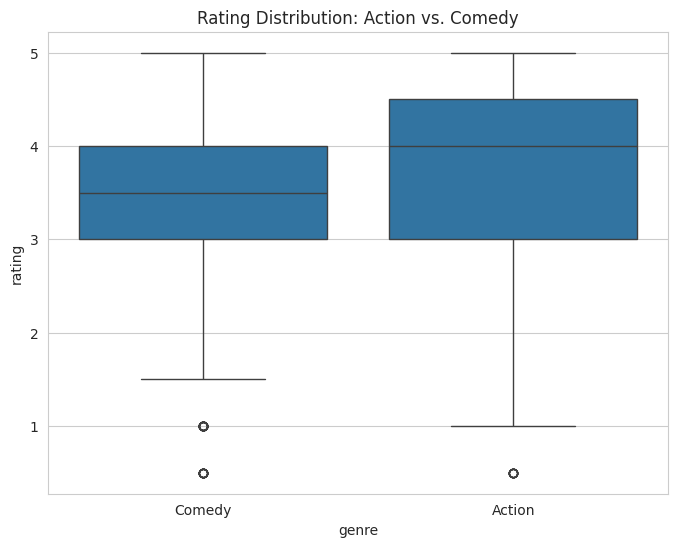

In [ ]:
# Unit 2, Q1

genre1 = 'Action'
genre2 = 'Comedy'

ratings_g1 = df_exploded[df_exploded['genre'] == genre1]['rating'].dropna()
ratings_g2 = df_exploded[df_exploded['genre'] == genre2]['rating'].dropna()

print(f"Genre 1: {genre1} (n={len(ratings_g1)}, mean={ratings_g1.mean():.2f})")
print(f"Genre 2: {genre2} (n={len(ratings_g2)}, mean={ratings_g2.mean():.2f})")

print("""
H0: The mean rating for 'Action' movies is equal to the mean rating for 'Comedy' movies.
H1: The mean rating for 'Action' movies is *not* equal to the mean rating for 'Comedy' movies.
""")

t_stat, p_value = stats.ttest_ind(ratings_g1, ratings_g2, equal_var=False, nan_policy='omit')

print(f"\nT-Test Results ({genre1} vs {genre2})")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

plt.figure(figsize=(8, 6))
sns.boxplot(
    data=df_exploded[df_exploded['genre'].isin([genre1, genre2])],
    x='genre',
    y='rating'
)
plt.title(f'Rating Distribution: {genre1} vs. {genre2}')
plt.savefig('ttest_genre_comparison_boxplot.png')
print("Plot saved: ttest_genre_comparison_boxplot.png")
plt.show()

In [ ]:
# Unit 2, Q2

selected_genre = 'Action'
ratings_genre = ratings_g1

n = len(ratings_genre)
mean = ratings_genre.mean()
std_dev = ratings_genre.std()
std_err = std_dev / np.sqrt(n)

confidence_level = 0.95
degrees_freedom = n - 1

if n > 1:
    t_score = stats.t.ppf((1 + confidence_level) / 2, degrees_freedom)
    margin_of_error = t_score * std_err
    ci_lower = mean - margin_of_error
    ci_upper = mean + margin_of_error

    print(f"\nMargin of Error Calculation for '{selected_genre}' Ratings (95% CI)")
    print(f"Sample Size (n): {n}")
    print(f"Sample Mean: {mean:.4f}")
    print(f"Sample Std Dev: {std_dev:.4f}")
    print(f"Standard Error: {std_err:.4f}")
    print(f"T-score (df={degrees_freedom}): {t_score:.4f}")
    print(f"Margin of Error (ME): {margin_of_error:.4f}")
    print(f"95% Confidence Interval (CI): ({ci_lower:.4f}, {ci_upper:.4f})")
    print(f"Result: {mean:.4f} ± {margin_of_error:.4f}")
else:
    print(f"Could not calculate Margin of Error for '{selected_genre}': Sample size (n={n}) is too small.")


--- Margin of Error Calculation for 'Action' Ratings (95% CI) ---
Sample Size (n): 538
Sample Mean: 3.6487
Sample Std Dev: 1.0567
Standard Error: 0.0456
T-score (df=537): 1.9644
Margin of Error (ME): 0.0895
95% Confidence Interval (CI): (3.5592, 3.7382)
Result: 3.6487 ± 0.0895


In [ ]:
# Unit 2, Q3

print("""The margin of error (MOE) shows how reliable our sample mean is.
A small MOE means our sample's average rating is a precise estimate, so we're confident it's very close to the true average for that genre.
A large MOE means our estimate is fuzzy and not reliable. It gives us a wide range, so we can't be very confident about the genre's true typical rating.""")

The margin of error (MOE) shows how reliable our sample mean is.
A small MOE means our sample's average rating is a precise estimate, so we're confident it's very close to the true average for that genre.
A large MOE means our estimate is fuzzy and not reliable. It gives us a wide range, so we can't be very confident about the genre's true typical rating.



Regression Model Performance
Features: ['movieId', 'userId', 'timestamp']
R-squared (R2): -0.0140
Mean Absolute Error (MAE): 0.8427
Mean Squared Error (MSE): 1.2057
Root Mean Squared Error (RMSE): 1.0981
Plot saved: actual_vs_predicted_regression.png


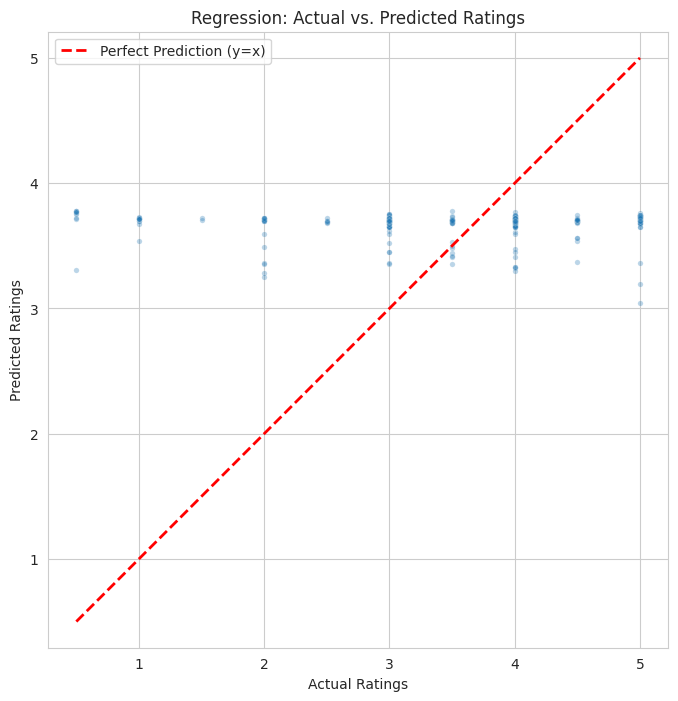

In [ ]:
# Unit 3, Q1

features = ['movieId', 'userId', 'timestamp']
target = 'rating'
cols_to_check = features + [target]
df_reg = df_cleaned.dropna(subset=cols_to_check).copy()

X = df_reg[features]
y = df_reg[target]

if X.empty or y.empty:
    print("Error: No data left after dropping NaNs for regression. Stopping Unit 3.")
else:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = LinearRegression()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    r2 = metrics.r2_score(y_test, y_pred)
    mae = metrics.mean_absolute_error(y_test, y_pred)
    mse = metrics.mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    print("\nRegression Model Performance")
    print(f"Features: {features}")
    print(f"R-squared (R2): {r2:.4f}")
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

    plt.figure(figsize=(8, 8))
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.3, s=15)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Prediction (y=x)')
    plt.xlabel('Actual Ratings')
    plt.ylabel('Predicted Ratings')
    plt.title('Regression: Actual vs. Predicted Ratings')
    plt.legend()
    plt.axis('equal')
    plt.grid(True)
    plt.savefig('actual_vs_predicted_regression.png')
    print("Plot saved: actual_vs_predicted_regression.png")
    plt.show()

    print("\n" + "="*40 + "\n")